# Final Project 2: Logistic regression

## Introduction

Perkenalkan kami dari kelompok 3 kelas KS08 program Python for Data Science Kampus Merdeka x Hacktiv8. Sebelum masuk ke materi izinkan kami memperkenalkan kelompok kami terlebih dahulu :

1. Fasal Alif Haikal Irawan
2. Diki Dwi Aji
3. Mely Sekhan

Pada final project ini kami dengan Dataset yang digunakan yaitu Rain in Australia yang berisi record data hujan harian selama 10 tahun di Australia. Kolom RainTomorrow adalah target variable yang mau diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain:

- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.

## Import Libraries

In [1]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

## Data Loading

In [2]:
# Mengambil data
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.shape

(145460, 23)

In [4]:
df.columns 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Menampilkan 5 data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Menampilkan 5 data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


## Data Cleaning

### Missing values check

In [7]:
df.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Handling Missing value 

In [9]:
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)
df.shape

(140787, 23)

In [10]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True, axis=1)
df.shape

(140787, 19)

In [11]:
df_new_clean = df.copy()
df_new_clean.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [12]:
df_new_clean['MinTemp']=df_new_clean['MinTemp'].fillna(df_new_clean['MinTemp'].mean())
df_new_clean['MaxTemp']=df_new_clean['MaxTemp'].fillna(df_new_clean['MaxTemp'].mean())

df_new_clean['Rainfall']=df_new_clean['Rainfall'].fillna(df_new_clean['Rainfall'].mean())

df_new_clean['WindGustSpeed']=df_new_clean['WindGustSpeed'].fillna(df_new_clean['WindGustSpeed'].mean())

df_new_clean['WindSpeed9am']=df_new_clean['WindSpeed9am'].fillna(df_new_clean['WindSpeed9am'].mean())
df_new_clean['WindSpeed3pm']=df_new_clean['WindSpeed3pm'].fillna(df_new_clean['WindSpeed3pm'].mean())

df_new_clean['Humidity9am']=df_new_clean['Humidity9am'].fillna(df_new_clean['Humidity9am'].mean())
df_new_clean['Humidity3pm']=df_new_clean['Humidity3pm'].fillna(df_new_clean['Humidity3pm'].mean())

df_new_clean['Pressure9am']=df_new_clean['Pressure9am'].fillna(df_new_clean['Pressure9am'].mean())
df_new_clean['Pressure3pm']=df_new_clean['Pressure3pm'].fillna(df_new_clean['Pressure3pm'].mean())

df_new_clean['Temp9am']=df_new_clean['Temp3pm'].fillna(df_new_clean['Temp9am'].mean())
df_new_clean['Temp3pm']=df_new_clean['Temp3pm'].fillna(df_new_clean['Temp3pm'].mean())

In [13]:
df_new_clean.dropna(axis=0, inplace=True)

In [14]:
df_new_clean.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
df_new_clean["Date"] = pd.to_datetime(df_new_clean["Date"])
df_new_clean['Day']=pd.DatetimeIndex(df_new_clean['Date']).day
df_new_clean['Month']=pd.DatetimeIndex(df_new_clean['Date']).month
df_new_clean['Year']=pd.DatetimeIndex(df_new_clean['Date']).year

In [16]:
df_new_clean = df_new_clean.drop(columns="Date")
df_new_clean.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,21.8,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,24.3,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,23.2,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,26.5,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,29.7,29.7,No,No,5,12,2008


## Data Exploration

In [17]:
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   WindGustDir    123710 non-null  object 
 5   WindGustSpeed  123710 non-null  float64
 6   WindDir9am     123710 non-null  object 
 7   WindDir3pm     123710 non-null  object 
 8   WindSpeed9am   123710 non-null  float64
 9   WindSpeed3pm   123710 non-null  float64
 10  Humidity9am    123710 non-null  float64
 11  Humidity3pm    123710 non-null  float64
 12  Pressure9am    123710 non-null  float64
 13  Pressure3pm    123710 non-null  float64
 14  Temp9am        123710 non-null  float64
 15  Temp3pm        123710 non-null  float64
 16  RainToday      123710 non-null  object 
 17  RainTomorrow   123710 non-nul

## Correlation

### Creating Categorical Columns

In [18]:
categ_col = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow",
    "Day",
    "Month",
    "Year"
]

df_categ = df_new_clean[categ_col]

df_categ.head(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,W,W,WNW,No,No,1,12,2008
1,Albury,WNW,NNW,WSW,No,No,2,12,2008
2,Albury,WSW,W,WSW,No,No,3,12,2008
3,Albury,NE,SE,E,No,No,4,12,2008
4,Albury,W,ENE,NW,No,No,5,12,2008


In [19]:
Lenc = LabelEncoder()

df_categ["Location"] = Lenc.fit_transform(df_categ["Location"])
df_categ["WindGustDir"] = Lenc.fit_transform(df_categ["WindGustDir"])
df_categ["WindDir9am"] = Lenc.fit_transform(df_categ["WindDir9am"])
df_categ["WindDir3pm"] = Lenc.fit_transform(df_categ["WindDir3pm"])
df_categ["RainToday"] = Lenc.fit_transform(df_categ["RainToday"])
df_categ["RainTomorrow"] = Lenc.fit_transform(df_categ["RainTomorrow"])
df_categ["Day"] = Lenc.fit_transform(df_categ["Day"])
df_categ["Month"] = Lenc.fit_transform(df_categ["Month"])
df_categ["Year"] = Lenc.fit_transform(df_categ["Year"])

df_categ.head(5)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_11676/1159241972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categ["Location"] = Lenc.fit_transform(df_categ["Location"])
C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_11676/1159241972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categ["WindGustDir"] = Lenc.fit_transform(df_categ["WindGustDir"])
C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_11676/1159241972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13,13,14,0,0,0,11,1
1,1,14,6,15,0,0,1,11,1
2,1,15,13,15,0,0,2,11,1
3,1,4,9,0,0,0,3,11,1
4,1,13,1,7,0,0,4,11,1


### Creating Correlation Data

In [20]:
corr_categ = df_categ.corr()
corr_categ


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.032922,-0.017452,0.020391,-0.002843,-0.001890,0.000473,-0.007448,0.031467
WindGustDir,0.032922,1.000000,0.408314,0.601815,0.135595,0.050900,-0.000090,0.046756,-0.006542
WindDir9am,-0.017452,0.408314,1.000000,0.319399,0.172744,0.031439,-0.005831,0.017667,0.000307
WindDir3pm,0.020391,0.601815,0.319399,1.000000,0.125807,0.027110,0.001253,0.034892,-0.005966
RainToday,-0.002843,0.135595,0.172744,0.125807,1.000000,0.315867,0.004062,0.007735,-0.012518
RainTomorrow,-0.001890,0.050900,0.031439,0.027110,0.315867,1.000000,0.005322,0.005723,-0.013528
Day,0.000473,-0.000090,-0.005831,0.001253,0.004062,0.005322,1.000000,0.014998,-0.005300
Month,-0.007448,0.046756,0.017667,0.034892,0.007735,0.005723,0.014998,1.000000,-0.117016
Year,0.031467,-0.006542,0.000307,-0.005966,-0.012518,-0.013528,-0.005300,-0.117016,1.000000


### Visualization Data

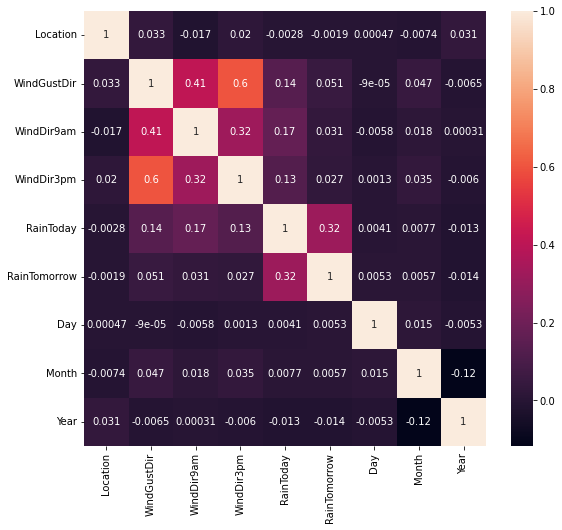

In [21]:
plt.figure(figsize=(9,8))

sns.heatmap(corr_categ, annot=True)

# Save Plot
plt.savefig("corr_categ.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show();

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

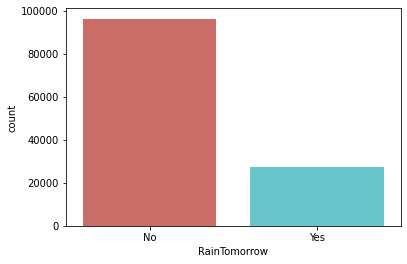

In [22]:
sns.countplot(x = 'RainTomorrow', data = df_new_clean, palette='hls')

## Create Numerical Colums

In [23]:
numer_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "RainTomorrow"
]

df_numer = df_new_clean[numer_col]

df_numer.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,No


## Create Correlation Data

In [24]:
corr_num = df_numer.corr()
corr_num

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.738283,0.099872,0.141259,0.138219,0.153703,-0.216670,-0.000882,-0.415805,-0.431130,0.700887,0.706245
MaxTemp,0.738283,1.000000,-0.079862,0.037297,-0.015504,0.024165,-0.505134,-0.508545,-0.297541,-0.391772,0.968851,0.975000
Rainfall,0.099872,-0.079862,1.000000,0.131532,0.085619,0.060373,0.236880,0.258584,-0.164740,-0.124274,-0.084461,-0.083478
WindGustSpeed,0.141259,0.037297,0.131532,1.000000,0.591774,0.675796,-0.176426,-0.011814,-0.424451,-0.380524,0.003257,0.003189
WindSpeed9am,0.138219,-0.015504,0.085619,0.591774,1.000000,0.504546,-0.219122,-0.012809,-0.193749,-0.143782,-0.023684,-0.024687
WindSpeed3pm,0.153703,0.024165,0.060373,0.675796,0.504546,1.000000,-0.100647,0.043991,-0.271338,-0.232225,0.004361,0.002926
Humidity9am,-0.216670,-0.505134,0.236880,-0.176426,-0.219122,-0.100647,1.000000,0.678741,0.108827,0.159279,-0.498432,-0.499824
Humidity3pm,-0.000882,-0.508545,0.258584,-0.011814,-0.012809,0.043991,0.678741,1.000000,-0.033966,0.043456,-0.560441,-0.561195
Pressure9am,-0.415805,-0.297541,-0.164740,-0.424451,-0.193749,-0.271338,0.108827,-0.033966,1.000000,0.959545,-0.251580,-0.254417
Pressure3pm,-0.431130,-0.391772,-0.124274,-0.380524,-0.143782,-0.232225,0.159279,0.043456,0.959545,1.000000,-0.351112,-0.355199


## Visualization Data

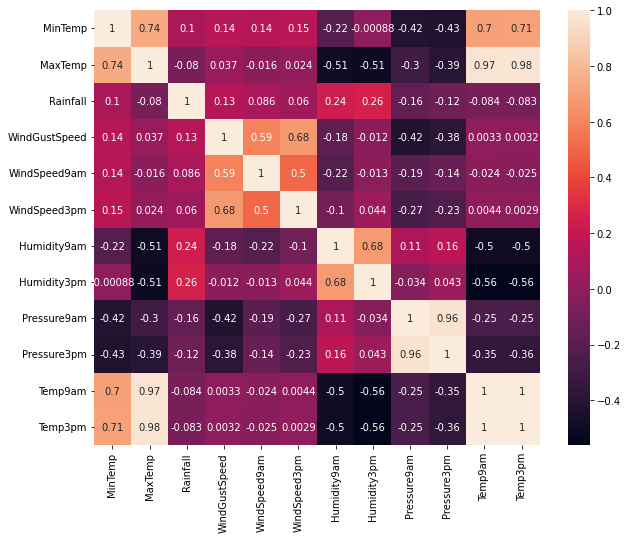

In [25]:
plt.figure(figsize=(10,8))

sns.heatmap(corr_num, annot=True)
# Save Plot
plt.savefig("corr_heatmap_num.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show();

## Data Preprocessing

In [29]:
df_predic = df_new_clean.drop(columns=['MinTemp','MaxTemp','WindDir9am','WindDir3pm','Temp9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am'])
df_predic.head(5)

,Location,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,0.6,W,44.0,22.0,1007.1,21.8,No,No,1,12,2008
1,Albury,0.0,WNW,44.0,25.0,1007.8,24.3,No,No,2,12,2008
2,Albury,0.0,WSW,46.0,30.0,1008.7,23.2,No,No,3,12,2008
3,Albury,0.0,NE,24.0,16.0,1012.8,26.5,No,No,4,12,2008
4,Albury,1.0,W,41.0,33.0,1006.0,29.7,No,No,5,12,2008


In [30]:
df_predic['Location']=df_categ['Location']
df_predic['WindGustDir']=df_categ['WindGustDir']
df_predic['RainToday']=df_categ['RainToday']
df_predic['RainTomorrow']=df_categ['RainTomorrow']
df_predic.head(5)

,Location,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,0.6,13,44.0,22.0,1007.1,21.8,0,0,1,12,2008
1,1,0.0,14,44.0,25.0,1007.8,24.3,0,0,2,12,2008
2,1,0.0,15,46.0,30.0,1008.7,23.2,0,0,3,12,2008
3,1,0.0,4,24.0,16.0,1012.8,26.5,0,0,4,12,2008
4,1,1.0,13,41.0,33.0,1006.0,29.7,0,0,5,12,2008


## Model Definition
Metode pengujian yang akan digunakan pada project kali ini adalah metode Logistic Regression dengan pembanding Random Forest Classifier</b>, <b>Decision Tree Classifier</b>, <b>Naive Bayes</b>, dan <b>K-Nearest Neighbors</b>. Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.</p>

In [31]:
#Membuat variabel x untuk menampung semua kolom kecuali RainTomorrow
x=df_predic.drop(columns=['RainTomorrow'])

#Membuat variabel y untuk menampung kolom RainTomorrow
y=df_predic['RainTomorrow']

In [32]:
#Split x and y into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [33]:
#Standarisasi data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)



## Model Training

In [34]:
#Membuat model Logistic Regression
lreg_model = LogisticRegression(penalty = 'l2', random_state = 8)

In [35]:
#Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear')

In [36]:
#Model Training Logistic Regression
lreg_model = lreg_model.fit(x_train, y_train)

In [37]:
#Predict Probabilitas
lreg_model.predict_proba(x_train)

array([[0.71242414, 0.28757586],
       [0.97188727, 0.02811273],
       [0.95267061, 0.04732939],
       ...,
       [0.82227577, 0.17772423],
       [0.57083838, 0.42916162],
       [0.83792211, 0.16207789]])

In [38]:
#Score dari data training
lreg_model.score(x_train,y_train)

0.8432393731884477

In [39]:
#Predict data
y_pred_lreg=lreg_model.predict(x_test)
y_pred_lreg

array([0, 0, 0, ..., 0, 0, 1])

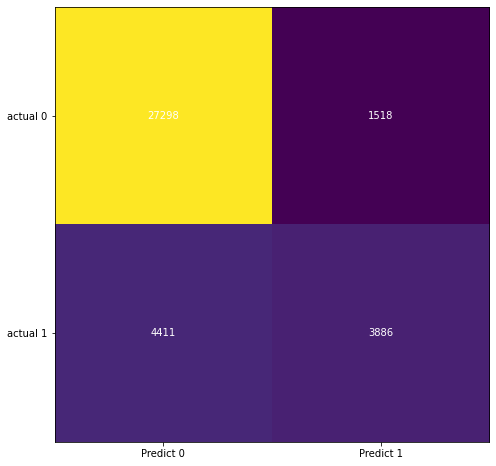

In [40]:
#Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_lreg)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('actual 0', 'actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='white')
        
# Save Plot
plt.savefig("confusion_matrix_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

In [41]:
#Accuracy Score
lreg_model.score(x_test,y_test)

0.8402446582060195

In [42]:
#Classification Report Logistic Regression Part 1
print(classification_report(y_test,y_pred_lreg))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28816
           1       0.72      0.47      0.57      8297

    accuracy                           0.84     37113
   macro avg       0.79      0.71      0.73     37113
weighted avg       0.83      0.84      0.83     37113



In [43]:
#Ringkasan Evaluasi Model Logistic Regression Part 1
print('Ringkasan Evaluasi Model Logistic Regression Part 1')
print("")
print('Akurasi :',round(accuracy_score(y_test, y_pred_lreg),3))
print('Presisi :',round(precision_score(y_test,y_pred_lreg),3))
print('Recall :',round(recall_score(y_test,y_pred_lreg),3))
print('F1 Score :',round(f1_score(y_test,y_pred_lreg),3))

Ringkasan Evaluasi Model Logistic Regression Part 1

Akurasi : 0.84
Presisi : 0.719
Recall : 0.468
F1 Score : 0.567


In [51]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_lreg))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28816
           1       0.72      0.47      0.57      8297

    accuracy                           0.84     37113
   macro avg       0.79      0.71      0.73     37113
weighted avg       0.83      0.84      0.83     37113



In [44]:
#melihat feature importance
importance=lreg_model.coef_[0]
sorted_index=np.argsort(importance)
labels=x.columns[sorted_index]
df_importance=pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
df_importance=df_importance.sort_values(by=['Feature Importance'], ascending=False)
df_importance

,Feature Name,Feature Importance
10,Humidity3pm,1.351978
9,WindGustSpeed,0.483087
8,RainToday,0.221132
7,Rainfall,0.070831
6,Month,0.030453
5,Temp3pm,0.026373
4,Year,0.001515
3,Day,-0.000238
2,WindGustDir,-0.014330
1,Location,-0.043503


In [74]:
df_pred2 = df_predic.drop(columns=[
    "Day",
    "WindGustDir",
    "Pressure3pm",
    "Temp3pm",
    "Month",
    "Year"
])
df_pred2.head()

,Location,Rainfall,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,1,0.6,44.0,22.0,0,0
1,1,0.0,44.0,25.0,0,0
2,1,0.0,46.0,30.0,0,0
3,1,0.0,24.0,16.0,0,0
4,1,1.0,41.0,33.0,0,0


In [46]:
x_2 = df_pred2.drop(columns=['RainTomorrow'])
y_2 = df_pred2['RainTomorrow']

x_train2, x_test2, y_train2,y_test2=train_test_split(x_2,y_2, test_size=0.3)

x_train2=scaler.fit_transform(x_train2)
x_test2=scaler.fit_transform(x_test2)

In [47]:
#Model Training Support Vector Machine
svm_model = svm_model.fit(x_train2, y_train2)

In [48]:
#Predict data
y_pred_svm = svm_model.predict(x_test2)

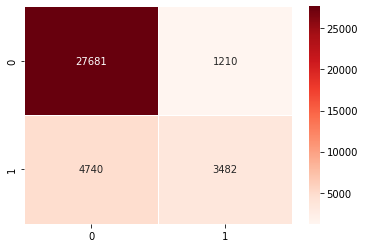

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     28891
           1       0.74      0.42      0.54      8222

    accuracy                           0.84     37113
   macro avg       0.80      0.69      0.72     37113
weighted avg       0.83      0.84      0.82     37113



In [49]:
cm_svm = confusion_matrix(y_test2, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()
print(classification_report(y_test2, y_pred_svm))

In [50]:
#Ringkasan Evaluasi Model Support Vector Machine
print('Ringkasan Evaluasi Model Support Vector Machine')
print("")
print('Akurasi :',round(accuracy_score(y_test2, y_pred_svm),3))
print('Presisi :',round(precision_score(y_test2,y_pred_svm),3))
print('Recall :',round(recall_score(y_test2,y_pred_svm),3))
print('F1 Score :',round(f1_score(y_test2,y_pred_svm),3))

Ringkasan Evaluasi Model Support Vector Machine

Akurasi : 0.84
Presisi : 0.742
Recall : 0.423
F1 Score : 0.539


In [54]:
import pickle
pickle.dump(svm_model, open('./model/model_FP2.pkl', 'wb'))